<a href="https://colab.research.google.com/github/gyujin0450/Rstudy/blob/master/R201_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

201. 데이터 정제 예제

In [32]:
# 데이터 분석 목적에 적합한 작업 진행하기!!

# 타이타닉 데이터 읽어오기
titanic <- read.csv("https://raw.githubusercontent.com/gyujin0450/dataset/master/titanic.csv")
head(titanic,10) 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
6,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S
7,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S
8,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S
9,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S


In [33]:
str(titanic) # 데이터 구조 파악

'data.frame':	1310 obs. of  11 variables:
 $ pclass  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ survived: int  1 1 0 0 0 1 1 0 1 0 ...
 $ name    : Factor w/ 1308 levels "","Abbing, Mr. Anthony",..: 23 25 26 27 28 32 47 48 52 56 ...
 $ sex     : Factor w/ 3 levels "","female","male": 2 3 2 3 2 3 2 3 2 3 ...
 $ age     : num  29 0.917 2 30 25 ...
 $ sibsp   : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch   : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket  : Factor w/ 930 levels "","110152","110413",..: 189 51 51 51 51 126 94 17 78 827 ...
 $ fare    : num  211 152 152 152 152 ...
 $ cabin   : Factor w/ 187 levels "","A10","A11",..: 45 81 81 81 81 151 147 17 63 1 ...
 $ embarked: Factor w/ 4 levels "","C","Q","S": 4 4 4 4 4 4 4 4 4 2 ...


In [34]:
summary(titanic) # 요약통계

     pclass         survived                                name     
 Min.   :1.000   Min.   :0.000   Connolly, Miss. Kate         :   2  
 1st Qu.:2.000   1st Qu.:0.000   Kelly, Mr. James             :   2  
 Median :3.000   Median :0.000                                :   1  
 Mean   :2.295   Mean   :0.382   Abbing, Mr. Anthony          :   1  
 3rd Qu.:3.000   3rd Qu.:1.000   Abbott, Master. Eugene Joseph:   1  
 Max.   :3.000   Max.   :1.000   Abbott, Mr. Rossmore Edward  :   1  
 NA's   :1       NA's   :1       (Other)                      :1302  
     sex           age              sibsp            parch      
       :  1   Min.   : 0.1667   Min.   :0.0000   Min.   :0.000  
 female:466   1st Qu.:21.0000   1st Qu.:0.0000   1st Qu.:0.000  
 male  :843   Median :28.0000   Median :0.0000   Median :0.000  
              Mean   :29.8811   Mean   :0.4989   Mean   :0.385  
              3rd Qu.:39.0000   3rd Qu.:1.0000   3rd Qu.:0.000  
              Max.   :80.0000   Max.   :8.0000   M

In [35]:
colSums(is.na(titanic)) # 결측치 확인

pclass survived     name      sex      age    sibsp    parch   ticket 
       1        1        0        0      264        1        1        0 
    fare    cabin embarked 
       2        0        0

In [36]:
# 결측치 처리 
# 1) 결측치 건수가 적은것은 제거 :  na.omit()
titanic2 <- na.omit(titanic)
colSums(is.na(titanic2))

pclass survived     name      sex      age    sibsp    parch   ticket 
       0        0        0        0        0        0        0        0 
    fare    cabin embarked 
       0        0        0

In [37]:
# 2) 대체값 넣기 : age 결측치는 중앙값으로 대체
# 소숫점 이하 처리 : round(반올림), floor(내림), ceil(올림)
mv <- floor(median(titanic$age, na.rm = T))
mv

[1] 28

In [38]:
# 중앙값으로 결측치 대치(조건문 필요!!!)
# boolean 인텍스
# titanic$age[] <- mv # 모든 나이컬럼에 중앙값 대입(X)
# is.na(titanic$age) #  age 컬럼의 결측치 여부 확인
# age 컬럼의 결측치를 포함된 항목을 찾아서 중앙값(mv)으로 대치
titanic$age[is.na(titanic$age)] <- mv
colSums(is.na(titanic))
# 나머지 결측치 제거
titanic3 <- na.omit(titanic) 
colSums(is.na(titanic3))

pclass survived     name      sex      age    sibsp    parch   ticket 
       1        1        0        0        0        1        1        0 
    fare    cabin embarked 
       2        0        0

pclass survived     name      sex      age    sibsp    parch   ticket 
       0        0        0        0        0        0        0        0 
    fare    cabin embarked 
       0        0        0

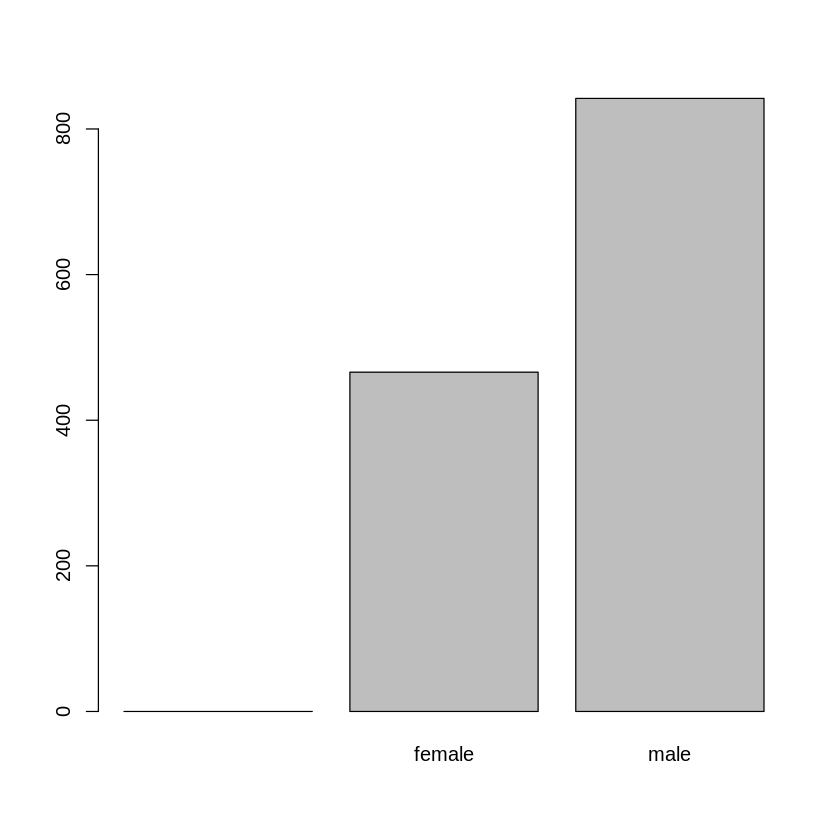

In [39]:
# 시각화
# 성별 승성객 수 시각화
frq_sex <- table(titanic3$sex)
barplot(frq_sex)# 성별 승성객 수 시각화
frq_sex <- table(titanic3$sex)
barplot(frq_sex)

In [40]:
# 위 결과, 여전히 이상한 값이 있는 듯...
table(titanic$sex)


       female   male 
     1    466    843 

In [ ]:
# Tip) read.csv 알아보기
# csv로 작성된 파일을 R로 읽어들일때 사용
# read.csv('파일경로', 헤더여부, 구분자, 결측치처리, 인코딩)
# read.csv('파일경로', header=F, sep='\t', na.strings='', encoding='euc-kr') 
# 구분자 : 탭의 경우 '\t'
# 결측치 : 빈문자열이 있는 경우 NA로 대체
# 한글로 작성된 자료 인코딩해야 하는 경우, euc-kr 로 함. 그래서, 가능하면 UTF-8로 작성 필요!!                          

In [41]:
titanic_na <- read.csv("https://raw.githubusercontent.com/gyujin0450/dataset/master/titanic.csv", na.strings='')

In [42]:
summary(titanic)

     pclass         survived                                name     
 Min.   :1.000   Min.   :0.000   Connolly, Miss. Kate         :   2  
 1st Qu.:2.000   1st Qu.:0.000   Kelly, Mr. James             :   2  
 Median :3.000   Median :0.000                                :   1  
 Mean   :2.295   Mean   :0.382   Abbing, Mr. Anthony          :   1  
 3rd Qu.:3.000   3rd Qu.:1.000   Abbott, Master. Eugene Joseph:   1  
 Max.   :3.000   Max.   :1.000   Abbott, Mr. Rossmore Edward  :   1  
 NA's   :1       NA's   :1       (Other)                      :1302  
     sex           age              sibsp            parch      
       :  1   Min.   : 0.1667   Min.   :0.0000   Min.   :0.000  
 female:466   1st Qu.:22.0000   1st Qu.:0.0000   1st Qu.:0.000  
 male  :843   Median :28.0000   Median :0.0000   Median :0.000  
              Mean   :29.5020   Mean   :0.4989   Mean   :0.385  
              3rd Qu.:35.0000   3rd Qu.:1.0000   3rd Qu.:0.000  
              Max.   :80.0000   Max.   :8.0000   M

In [44]:
summary(titanic_na)

     pclass         survived                                name     
 Min.   :1.000   Min.   :0.000   Connolly, Miss. Kate         :   2  
 1st Qu.:2.000   1st Qu.:0.000   Kelly, Mr. James             :   2  
 Median :3.000   Median :0.000   Abbing, Mr. Anthony          :   1  
 Mean   :2.295   Mean   :0.382   Abbott, Master. Eugene Joseph:   1  
 3rd Qu.:3.000   3rd Qu.:1.000   Abbott, Mr. Rossmore Edward  :   1  
 Max.   :3.000   Max.   :1.000   (Other)                      :1302  
 NA's   :1       NA's   :1       NA's                         :   1  
     sex           age              sibsp            parch      
 female:466   Min.   : 0.1667   Min.   :0.0000   Min.   :0.000  
 male  :843   1st Qu.:21.0000   1st Qu.:0.0000   1st Qu.:0.000  
 NA's  :  1   Median :28.0000   Median :0.0000   Median :0.000  
              Mean   :29.8811   Mean   :0.4989   Mean   :0.385  
              3rd Qu.:39.0000   3rd Qu.:1.0000   3rd Qu.:0.000  
              Max.   :80.0000   Max.   :8.0000   M

In [45]:
colSums(is.na(titanic_na)) # 결측치 확인

pclass survived     name      sex      age    sibsp    parch   ticket 
       1        1        1        1      264        1        1        1 
    fare    cabin embarked 
       2     1015        3

In [46]:
mv <- floor(median(titanic_na$age, na.rm = T))
mv
titanic_na$age[is.na(titanic_na$age)] <- mv
colSums(is.na(titanic_na))

[1] 28

pclass survived     name      sex      age    sibsp    parch   ticket 
       1        1        1        1        0        1        1        1 
    fare    cabin embarked 
       2     1015        3

In [47]:
# 나머지 결측치 제거
titanic_omit <- na.omit(titanic_na) 
colSums(is.na(titanic_omit))

pclass survived     name      sex      age    sibsp    parch   ticket 
       0        0        0        0        0        0        0        0 
    fare    cabin embarked 
       0        0        0

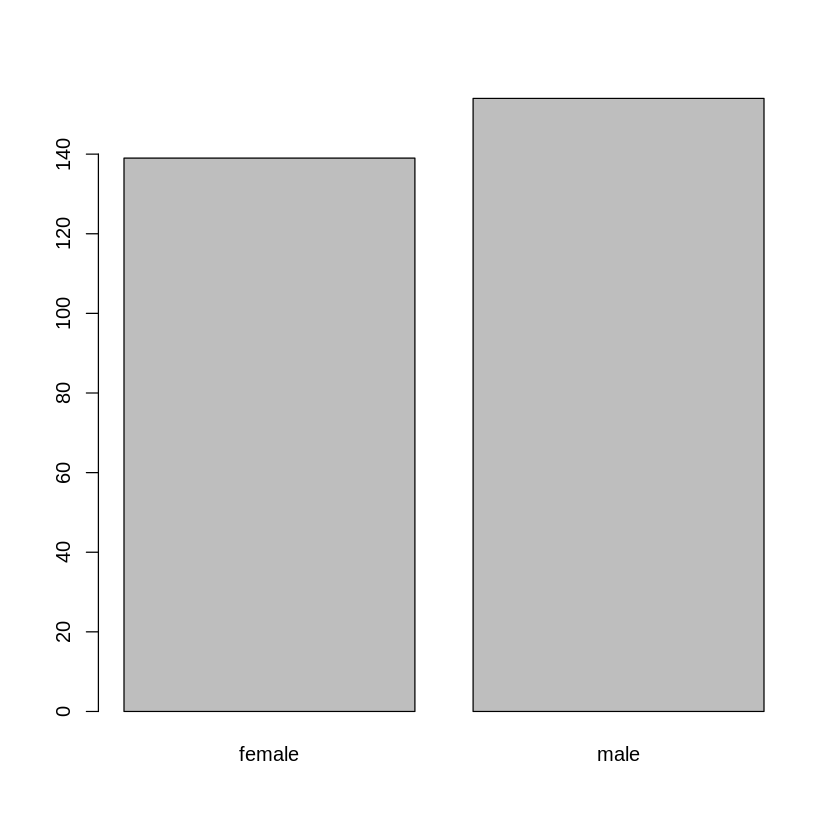

In [48]:
# 성별 승성객 수 시각화
frq_sex <- table(titanic_omit$sex)
barplot(frq_sex)